#               **Loan Eligibility Prediction Project**

# **Overview**

The idea for this project and analysis is to predict whether a person is likely to receive a loan based on personal, financial, and other relevant factors. We'll examine which specific reasons improve or negatively impact a person's ability to secure a loan.

First, we will perform various analyses on the data to determine the necessary features and variables for our prediction. Prior to this, we need to clean and prepare the dataset. Additionally, we will conduct both bivariate and univariate analyses on the features themselves to understand their relationships.

By the end of this project, we should have a solid understanding of the dataset, allowing us to train various models that can accurately predict a person's chances of becoming eligible for a loan


### Questions to Answer

- What factors increases or decrease a person's likelyhood to get a loan.

### Sections

1. Data Preparation
2. Data Analysis
3. Model Building
4. Model Evaluation
5. Save Model    


## **Import Libraries**

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.linear_model as logistic_regression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold,train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, mean_squared_error,precision_score,recall_score,f1_score,auc,accuracy_score
from sklearn.preprocessing import  MinMaxScaler,OneHotEncoder,LabelEncoder,RobustScaler
import pickle

## **About the Dataset**

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Link to the dataset [Loan Eligible Dataset](https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?select=loan-train.csv)

In [19]:
dataset_description = {
    "Loan_ID": "Unique Loan ID",
    "Gender": "Male/Female",
    "Married": "Applicant married (Y/N)",
    "Dependents": "Number of dependents",
    "Education": "Applicant Education (Graduate/Undergraduate)",
    "Self_Employed": "Self-employed (Y/N)",
    "ApplicantIncome": "Applicant income",
    "CoapplicantIncome": "Coapplicant income",
    "LoanAmount": "Loan amount in thousands",
    "Loan_Amount_Term": "Term of a loan in months",
    "Credit_History": "Credit history meets guidelines",
    "Property_Area": "Urban/Semi-Urban/Rural",
    "Loan_Status": "Loan approved (Y/N)"}

column_description = pd.DataFrame(dataset_description.items(), columns=["Column", "Description"])
column_description

,Column,Description
0,Loan_ID,Unique Loan ID
1,Gender,Male/Female
2,Married,Applicant married (Y/N)
3,Dependents,Number of dependents
4,Education,Applicant Education (Graduate/Undergraduate)
5,Self_Employed,Self-employed (Y/N)
6,ApplicantIncome,Applicant income
7,CoapplicantIncome,Coapplicant income
8,LoanAmount,Loan amount in thousands
9,Loan_Amount_Term,Term of a loan in months


## **Load Dataset**

In [20]:
import os
os.chdir(r'C:\Users\Dell\Loan-Eligibility-Prediction-Project')

df_train = pd.read_csv('data/loan-train.csv')
df_test = pd.read_csv('data/loan-test.csv')

df_train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [21]:
df_test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


## Data Exploration

In [22]:
df_train.head(10).T

,0,1,2,3,4,5,6,7,8,9
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Dependents,0,1,0,0,0,2,0,3+,2,1
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
# Remove Loan ID
df_train.drop(columns=["Loan_ID"], inplace=True)

> It's clear to observe at first glance that we've a missing or null values for some of the columns such as *LoanAmount*.

In [25]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [26]:
df_train.nunique().sort_values(ascending=False)

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
dtype: int64

In [27]:
df_train['Loan_Amount_Term'].value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [28]:
df_train['Gender'].value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

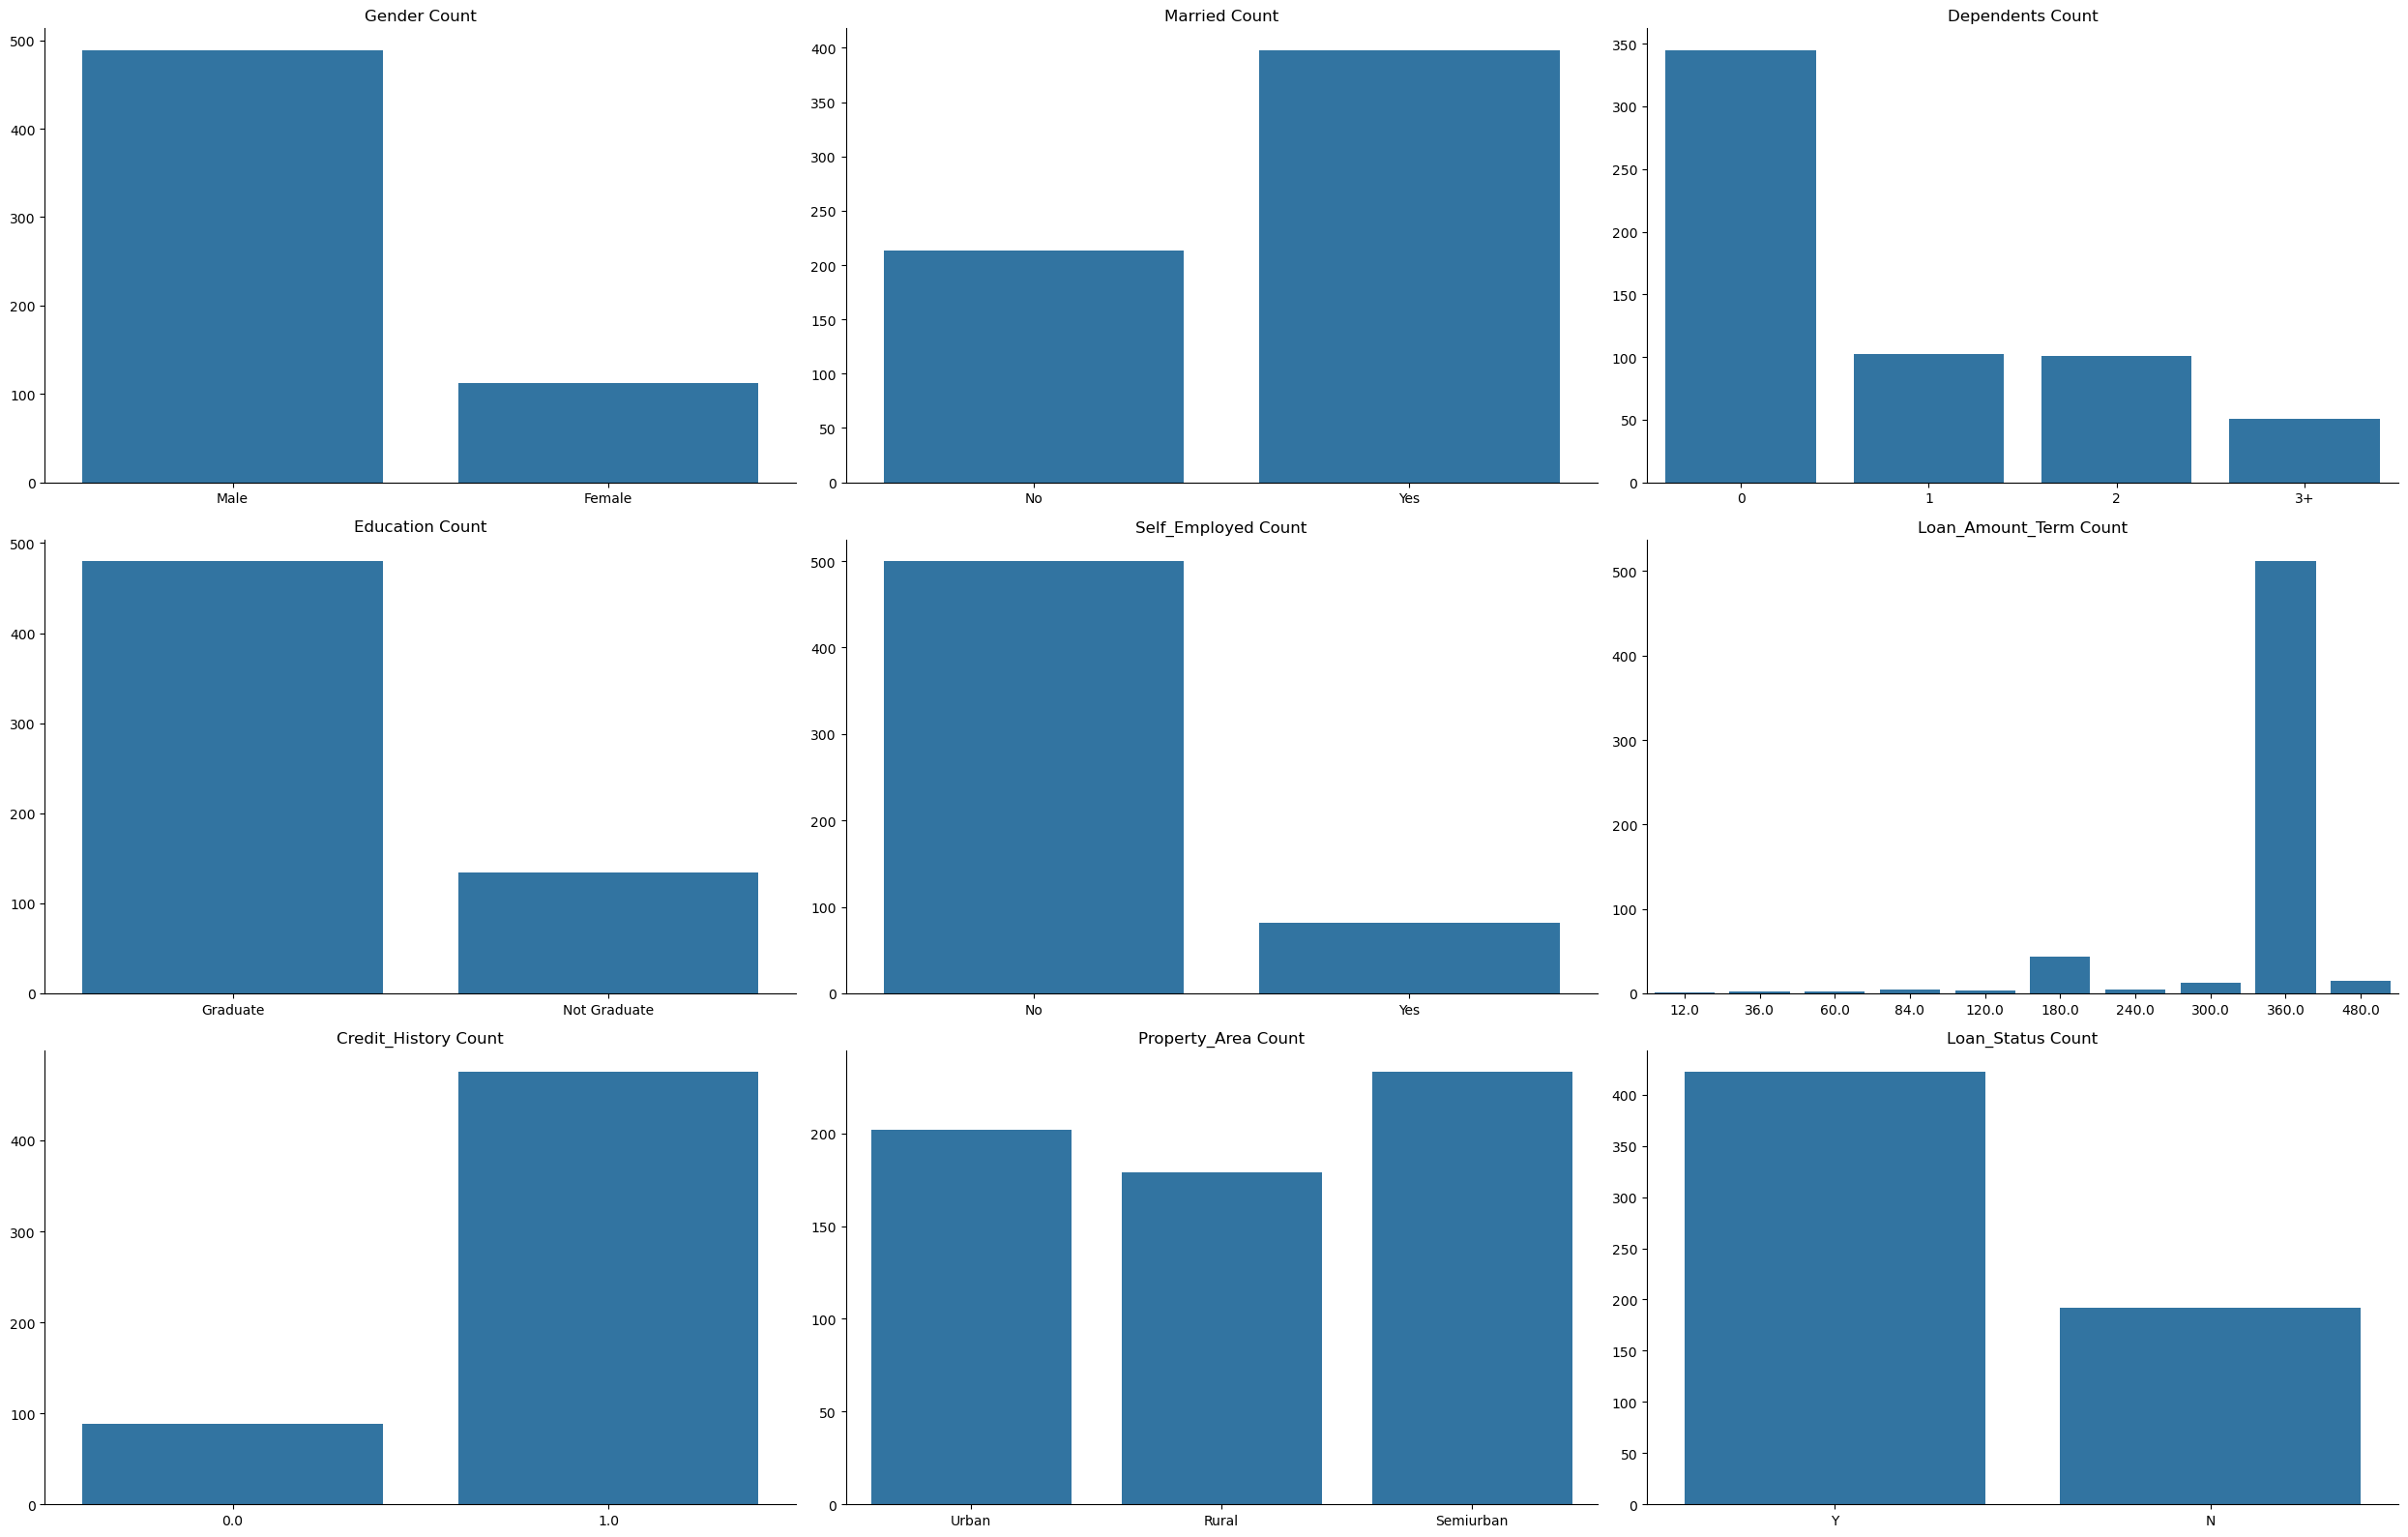

In [29]:
plot_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
plt.figure(figsize=(25, 16))

for idx, col in enumerate(plot_cols):
    plt.subplot(3,3,idx+1)
    sns.countplot(x=col, data=df_train)
    plt.title(f"{col} Count")
    sns.despine()
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(False)
    plt.tight_layout()

plt.show();

In [30]:
df_train['Loan_Status'].value_counts() / len(df_train) * 100

Loan_Status
Y    68.729642
N    31.270358
Name: count, dtype: float64

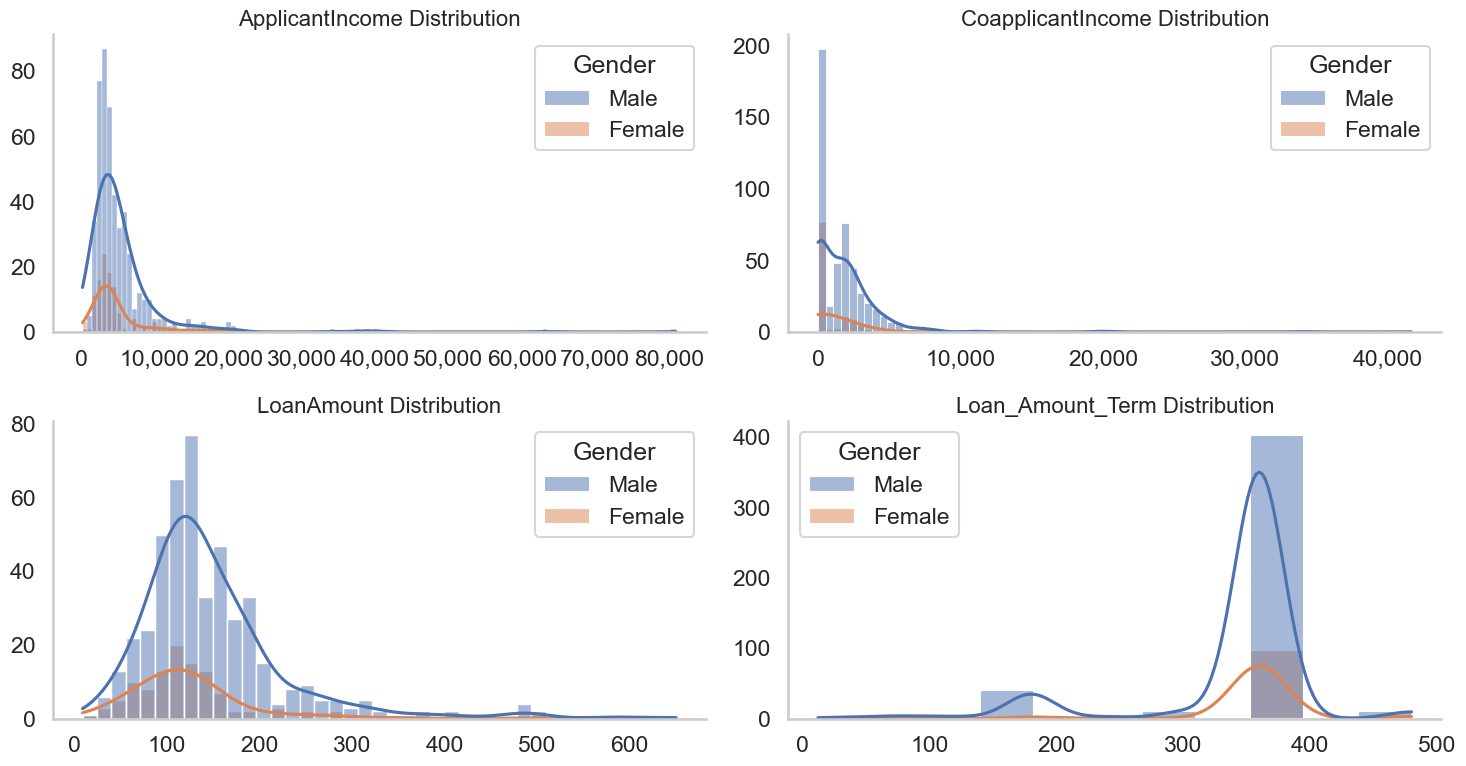

In [31]:
plot_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

# Set the style and context for the plots
sns.set(style="whitegrid", context="talk")

# Create a figure with a specified size
plt.figure(figsize=(15, 8))

# Loop through each column and create a subplot
for idx, col in enumerate(plot_cols):
    plt.subplot(2, 2, idx + 1)  # Create a subplot in a 3x1 grid
    sns.histplot(data=df_train, x=col, kde=True, hue='Gender')
    plt.title(f"{col} Distribution", fontsize=16)
    sns.despine()
    plt.grid(False)  # Remove the grid lines
    plt.ylabel("")
    plt.xlabel("")
    ticks_x = plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))  # Format the x-axis ticks
    plt.gca().xaxis.set_major_formatter(ticks_x)  # Apply the formatting to the plot
    plt.tight_layout()

# Adjust layout to add space between rows
plt.tight_layout()

# Show the plot
plt.show()

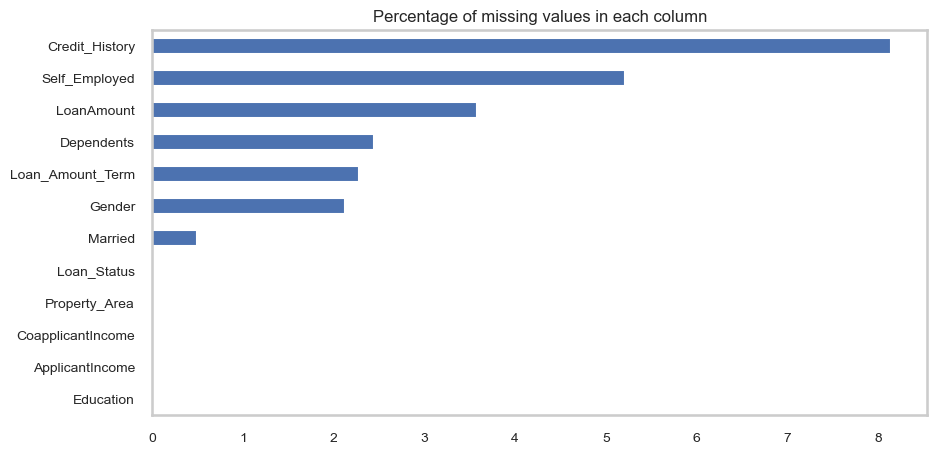

In [32]:
null_count = df_train.isnull().sum().sort_values(ascending=True)
round(null_count/len(df_train)*100,2).plot(kind='barh', figsize=(10,5),fontsize=10)
plt.title("Percentage of missing values in each column",fontsize=12)
plt.ylabel("Percentage", fontsize=6)
plt.ylabel("Column", fontsize=6, rotation=0.8)
plt.grid(False)
plt.xlabel("")
plt.ylabel("")
plt.show()


In [33]:
df_train['Credit_History'].value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

In [34]:
df_train[df_train['Credit_History'].isnull()].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y


In [35]:
df_train[df_train['Self_Employed'].isnull()].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N


In [36]:
df_train[df_train['LoanAmount'].isnull()].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N


A few values in our dataframe are missing we need to impute them so tha twe get a better understanding. But before doing so, I believe in splitting the data before hand, so that data imputations or scaling can be done. This way we avoid Data Leakage.

## Data Cleaning & Preparation

In [37]:

object_columns = df_train.drop(columns=['Loan_Status']).select_dtypes(include=["object"]).columns.tolist()
float_columns = df_train.select_dtypes(include=["float","int"]).columns.tolist() 

### Spliting Data

In [38]:
X = df_train.drop(['Loan_Status'], axis=1)
y = df_train['Loan_Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Imputation


In [39]:
from sklearn.impute import SimpleImputer
imputer_obj = SimpleImputer(strategy='most_frequent')
imputer_mum = SimpleImputer(strategy='median')

# Apply the imputer to the train and test sets
for col in object_columns:
    X_train[col] = imputer_obj.fit_transform(X_train[[col]]).ravel()
    X_test[col] = imputer_obj.fit_transform(X_test[[col]]).ravel()

for col in float_columns:
    X_train[col] = imputer_mum.fit_transform(X_train[[col]]).ravel()
    X_test[col] = imputer_mum.fit_transform(X_test[[col]]).ravel()
    
#Check for missing values to see the changes made
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Dummy Variables

In [40]:
dummy_cols = ['Dependents','Property_Area']

X_train = pd.get_dummies(X_train, columns=dummy_cols, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=dummy_cols, drop_first=True, dtype=int)

X_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
83,Male,Yes,Graduate,No,6000.0,2250.0,265.0,360.0,1.0,0,0,0,1,0
90,Male,Yes,Graduate,No,2958.0,2900.0,131.0,360.0,1.0,0,0,0,1,0
227,Male,Yes,Graduate,No,6250.0,1695.0,210.0,360.0,1.0,0,1,0,1,0
482,Male,Yes,Graduate,No,2083.0,3150.0,128.0,360.0,1.0,0,0,0,1,0
464,Male,No,Graduate,No,4166.0,0.0,98.0,360.0,0.0,0,0,0,1,0


### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

colm_y = ['Loan_Status']
colms = ['Gender','Married','Education','Self_Employed','Credit_History']

# note that the target variable is also included in the list
# label encoder assigns numeracal values based on teh alphabe order so N : 0, Y : 1
X_train[colms] = X_train[colms].apply(LabelEncoder.fit_transform)
X_test[colms] = X_test[colms].apply(LabelEncoder.fit_transform)

# and the same for the for the target variable
y_train = LabelEncoder.fit_transform(y_train)
y_test = LabelEncoder.transform(y_test)

X_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
83,1,1,0,0,6000.0,2250.0,265.0,360.0,1,0,0,0,1,0
90,1,1,0,0,2958.0,2900.0,131.0,360.0,1,0,0,0,1,0
227,1,1,0,0,6250.0,1695.0,210.0,360.0,1,0,1,0,1,0
482,1,1,0,0,2083.0,3150.0,128.0,360.0,1,0,0,0,1,0
464,1,0,0,0,4166.0,0.0,98.0,360.0,0,0,0,0,1,0


### Scaling

In [42]:
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
scalables = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

MinMaxScaler = MinMaxScaler()
StandardScaler = StandardScaler()
X_train[scalables] = MinMaxScaler.fit_transform(X_train[scalables])
X_test[scalables] = MinMaxScaler.transform(X_test[scalables])


X_train[scalables].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
83,0.072356,0.054000,0.363104,0.74359
90,0.034731,0.069599,0.166911,0.74359
227,0.075448,0.040680,0.282577,0.74359
482,0.023908,0.075599,0.162518,0.74359
464,0.049672,0.000000,0.118594,0.74359


> Yes! Done with the boring part. Now that our data is scaled we can finally fit it to our model and make predictions.

## Coorelation of Variables

Text(0.5, 1.0, 'Correlation Matrix of Variables')

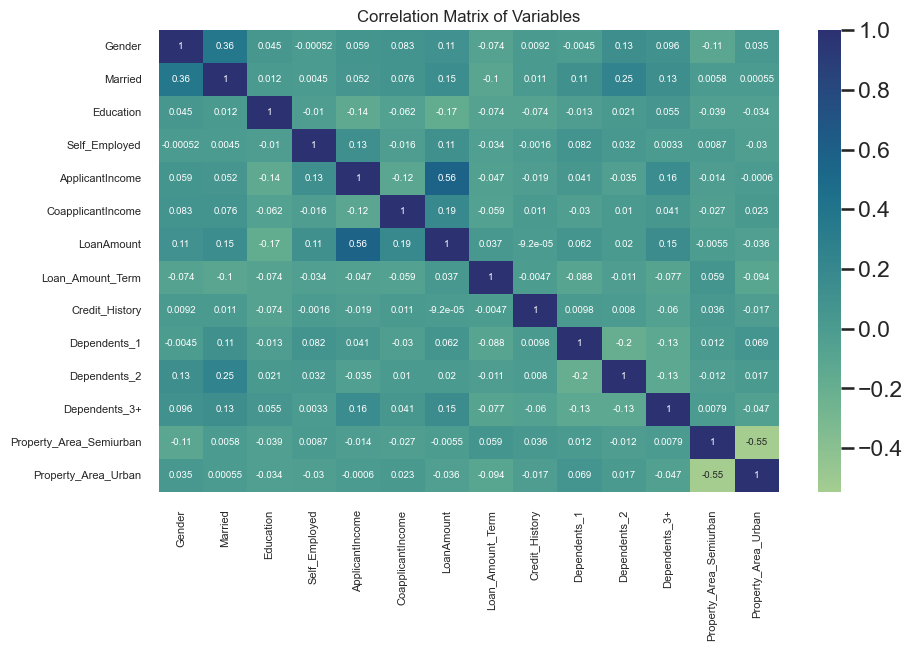

In [43]:
plot_df = pd.concat([X_train, X_test], axis=0)
#df_train.drop(['Loan_ID','Loan_Status'], axis=1)
plot_df = plot_df.dropna()
corr_matrix = plot_df.corr()

plt.figure(figsize=(10, 6))
res = sns.heatmap(data=corr_matrix,cmap='crest',annot=True,annot_kws={"size": 7},cbar=True)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 8)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 8, rotation=90)
plt.title("Correlation Matrix of Variables", fontsize=12)

## Create Model

In [44]:
from sklearn.linear_model import LogisticRegression
#lr_model = LogisticRegression()
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

C = 0.01
from sklearn.linear_model import LogisticRegressionCV
# L1 regularization
lr_1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', random_state=42, solver='liblinear').fit(X_train, y_train)

# L2 regularization
lr_2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', random_state=42, solver='liblinear').fit(X_train, y_train)

### Regularization

In [45]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['Log_Regression', 'Log_Regression_l1', 'Log_Regression_l2']
coeff_models = [lr, lr_1, lr_2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,Log_Regression,Log_Regression_l1,Log_Regression_l2
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [46]:
y_prob.head()

,Log_Regression,Log_Regression_l1,Log_Regression_l2
0,0.880098,0.902462,0.902309
1,0.892955,0.918836,0.918737
2,0.823738,0.834475,0.834479
3,0.738654,0.718641,0.718752
4,0.835896,0.864194,0.864053


## Model Evaluation


In [47]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score 
from sklearn.preprocessing import label_binarize


metrics = list()
cm = dict()

for lab in coeff_labels:

    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    accuarcy = accuracy_score(y_test, y_pred[lab])

    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
    label_binarize(y_pred[lab], classes=[0,1]),average='weighted')
    
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuarcy, 'AUC':auc}, name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

,Log_Regression,Log_Regression_l1,Log_Regression_l2
precision,0.825253,0.825253,0.825253
recall,0.788618,0.788618,0.788618
fscore,0.761491,0.761491,0.761491
accuracy,0.788618,0.788618,0.788618
AUC,0.703052,0.703052,0.703052


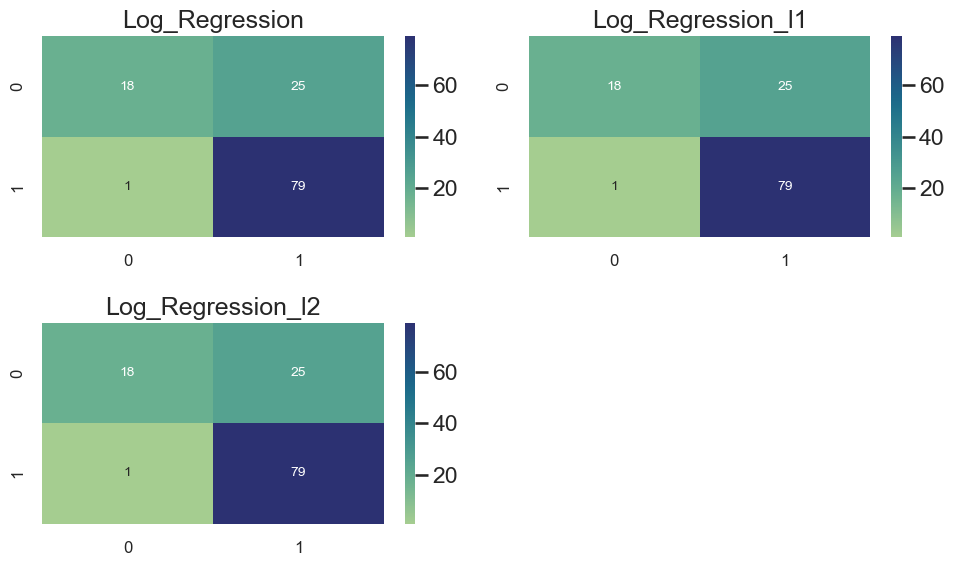

In [48]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10, 6)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    res = sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d',cmap='crest',annot_kws={"size": 10})       
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)    
    ax.set(title=lab);
    
plt.tight_layout()

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)


                    feature       VIF
0                    Gender  5.649255
1                   Married  3.427033
2                 Education  1.323553
3             Self_Employed  1.201317
4           ApplicantIncome  2.845782
5         CoapplicantIncome  1.439464
6                LoanAmount  5.445761
7          Loan_Amount_Term  9.977454
8            Credit_History  6.068139
9              Dependents_1  1.362585
10             Dependents_2  1.415556
11            Dependents_3+  1.243819
12  Property_Area_Semiurban  2.295484
13      Property_Area_Urban  2.044968


In [50]:
from sklearn.inspection import permutation_importance

# compute importances
model_fi = permutation_importance(lr, X_train, y_train, n_repeats=10, random_state=42)
impo = pd.DataFrame(model_fi['importances_mean']*100)
cols = pd.DataFrame(X_train.columns)
importnac_plot = pd.concat([cols, impo], axis=1)
importnac_plot.columns = ['Feature', 'Importance']

importnac_plot

,Feature,Importance
0,Gender,0.000000
1,Married,-0.061100
2,Education,-0.020367
3,Self_Employed,0.000000
4,ApplicantIncome,0.000000
5,CoapplicantIncome,-0.061100
6,LoanAmount,-0.061100
7,Loan_Amount_Term,0.000000
8,Credit_History,16.863544
9,Dependents_1,-0.101833


In [51]:
coef = pd.DataFrame(abs(lr_1.coef_)).T
cols = pd.DataFrame(X_train.columns)

coef_per_col = pd.concat([cols, coef], axis=1)
coef_per_col.columns = ['Feature', 'Coefficient']
coef_per_col

,Feature,Coefficient
0,Gender,0.096838
1,Married,0.693611
2,Education,0.349341
3,Self_Employed,0.135004
4,ApplicantIncome,0.362958
5,CoapplicantIncome,2.170357
6,LoanAmount,1.256752
7,Loan_Amount_Term,0.087958
8,Credit_History,3.930523
9,Dependents_1,0.522601


Ceof 

## Cross Validation

In [56]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
    }

lr = LogisticRegression(random_state=42,max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Find the best model
best_model = grid_search.best_estimator_

#Evaluate teh best model with CV
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated scores: {cv_scores}")


y_pred_best = best_model.predict(X_test)

# Compute the evaluate model
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
fscore = f1_score(y_test, y_pred_best, average='weighted')
accuracy = accuracy_score(y_test, y_pred_best)
auc = roc_auc_score(label_binarize(y_test, classes=[0, 1]), label_binarize(y_pred_best, classes=[0, 1]), average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {fscore}")
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}");

Cross-validated scores: [0.84848485 0.80612245 0.82653061 0.78571429 0.80612245]
Precision: 0.8252526249958856
Recall: 0.7886178861788617
F1-Score: 0.7614910090194872
Accuracy: 0.7886178861788617
AUC: 0.7030523255813954


# Save Model

In [401]:
with open('model/best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)